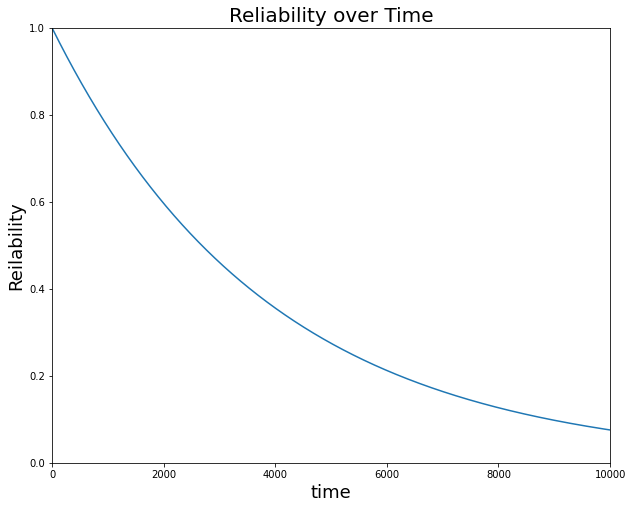

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class IDA:


    def __init__(self, data):
        self.x = np.array(data)


    def youngers_and_olders(self, last_check):
        olders = self.x > last_check
        youngers = ~olders
        self.olders = self.x[olders]
        self.youngers = self.x[youngers]
        

    def calc_lambda_complete_lifetime_only(self):
        self.mmtf = np.sum(self.youngers)/len(self.youngers)
        return self.mmtf
    
    def calc_lambda_complete_and_right_censored(self):
        self.mmtf = (np.sum(self.youngers) + np.sum(self.olders)) / (len(self.youngers))
        return self.mmtf
    
    def calc_lambda(self):
        self.lamb =  (1/self.mmtf)
        return self.lamb
    
    def plot_reliability(self, xlimit=None, ylimit=None, color=None):
        plt.figure(figsize=(10,8))
        plt.title("Reliability over Time", fontsize=20)
        plt.xlabel("time", fontsize=18)
        plt.ylabel("Reilability", fontsize=18)
        if xlimit == None:
            xlimit = max(self.x)
        if ylimit == None:
            ylimit = 1
        plt.xlim([0, xlimit])
        plt.ylim([0,1])
        t = np.linspace(0,xlimit, 10000)
        self.lamb = self.calc_lambda()
        y = np.exp(-1 * self.lamb * t)
        plt.plot(t,y,c=color)

        
data = pd.read_csv("../data.csv")
x = np.array(data.data)
x = np.concatenate((x, np.full(10, 5001)))
ida = IDA(x)
ida.youngers_and_olders(5000)
ida.calc_lambda_complete_and_right_censored()
ida.calc_lambda()
ida.plot_reliability(xlimit=10000)